In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from google.colab import files

In [ ]:
# Read data for each year into separate DataFrames
data_2017 = pd.read_csv('https://raw.githubusercontent.com/yusralk/data-sci-fa23/main/data/2017_S0802.csv')
data_2018 = pd.read_csv('https://raw.githubusercontent.com/yusralk/data-sci-fa23/main/data/2018_S0802.csv')
data_2019 = pd.read_csv('https://raw.githubusercontent.com/yusralk/data-sci-fa23/main/data/2019_S0802.csv')
data_2021 = pd.read_csv('https://raw.githubusercontent.com/yusralk/data-sci-fa23/main/data/2021_S0802.csv')
data_2022 = pd.read_csv('https://raw.githubusercontent.com/yusralk/data-sci-fa23/main/data/2022_S0802.csv')

# Transpose all the data to make it easier to analyze
#2017
data_2017 = data_2017.transpose()
data_2017 = data_2017.iloc[0:5]
#2018
data_2018 = data_2018.transpose()
data_2018 = data_2018.iloc[0:5]
#2019
data_2019 = data_2019.transpose()
data_2019 = data_2019.iloc[0:5]
#2021
data_2021 = data_2021.transpose()
data_2021 = data_2021.iloc[0:5]
#2022
data_2022 = data_2022.transpose()
data_2022 = data_2022.iloc[0:5]
# Converting the First Row to Column Names
#2017
data_2017.columns = data_2017.iloc[0]
data_2017 = data_2017[1:]
#2018
data_2018.columns = data_2018.iloc[0]
data_2018 = data_2018[1:]
#2019
data_2019.columns = data_2019.iloc[0]
data_2019 = data_2019[1:]
#2021
data_2021.columns = data_2021.iloc[0]
data_2021 = data_2021[1:]
#2022
data_2022.columns = data_2022.iloc[0]
data_2022 = data_2022[1:]

# Remove NaN columns
data_2017 = data_2017.drop(np.nan, axis=1)
data_2018 = data_2018.drop(np.nan, axis=1)
data_2019 = data_2019.drop(np.nan, axis=1)
data_2021 = data_2021.drop(np.nan, axis=1)
#data_2022 = data_2022.drop(np.nan, axis=1)
#seems like there are no NaN values in 2022 data
del data_2018["Label"]
del data_2019["Label"]
del data_2021["Label"]
# convert all values to numeric values for analysis
data_2017 = data_2017.apply(pd.to_numeric)
data_2018 = data_2018.apply(pd.to_numeric)
data_2019 = data_2019.apply(pd.to_numeric)
data_2021 = data_2021.apply(pd.to_numeric)
data_2022 = data_2022.apply(pd.to_numeric)

data_2017

Unnamed: 0                                 Workers 16 years and over  \
Total                                                    152802672.0   
Car, truck, or van -- drove alone                        116736603.0   
Car, truck, or van -- carpooled                           13604253.0   
Public transportation (excluding taxicab)                  7637296.0   

Unnamed: 0                                 16 to 19 years  20 to 24 years  \
Total                                           5348094.0      14516254.0   
Car, truck, or van -- drove alone               3502098.0      10623031.0   
Car, truck, or van -- carpooled                  829859.0       1605302.0   
Public transportation (excluding taxicab)        213844.0        840103.0   

Unnamed: 0                                 25 to 44 years  45 to 54 years  \
Total                                          66316360.0      32241364.0   
Car, truck, or van -- drove alone              50430212.0      25215106.0   
Car, truck, or van -- carpooled                 6257956.0       2652829.0   
Public transportation (excluding taxicab)       3826285.0       1382351.0   

Unnamed: 0                                 55 to 59 years  60 years and over  \
Total                                          14821859.0         19558742.0   
Car, truck, or van -- drove alone              11790397.0         15175758.0   
Car, truck, or van -- carpooled                 1061132.0          1210779.0   
Public transportation (excluding taxicab)        610984.0           763730.0   

Unnamed: 0                                 Median age (years)        Male  \
Total                                                    42.0  80832613.0   
Car, truck, or van -- drove alone                        42.0  61870400.0   
Car, truck, or van -- carpooled                          38.0   7169441.0   
Public transportation (excluding taxicab)                38.0   3811011.0   

Unnamed: 0                                     Female  ...  30 to 34 minutes  \
Total                                      71970059.0  ...        19983553.0   
Car, truck, or van -- drove alone          54866203.0  ...        16343124.0   
Car, truck, or van -- carpooled             6434812.0  ...         1931804.0   
Public transportation (excluding taxicab)   3826285.0  ...         1176144.0   

Unnamed: 0                                 35 to 44 minutes  45 to 59 minutes  \
Total                                            10136585.0        12019093.0   
Car, truck, or van -- drove alone                 8288299.0         9338928.0   
Car, truck, or van -- carpooled                    925089.0         1183570.0   
Public transportation (excluding taxicab)          786641.0         1344164.0   

Unnamed: 0                                 60 or more minutes  \
Total                                              13467177.0   
Car, truck, or van -- drove alone                   8638509.0   
Car, truck, or van -- carpooled                     1482864.0   
Public transportation (excluding taxicab)           2978545.0   

Unnamed: 0                                 Mean travel time to work (minutes)  \
Total                                                                    27.0   
Car, truck, or van -- drove alone                                        26.0   
Car, truck, or van -- carpooled                                          28.0   
Public transportation (excluding taxicab)                                50.0   

Unnamed: 0                                 Workers 16 years and over in households  \
Total                                                                  151339299.0   
Car, truck, or van -- drove alone                                      116355953.0   
Car, truck, or van -- carpooled                                         13491862.0   
Public transportation (excluding taxicab)                                7530977.0   

Unnamed: 0                                 No vehicle available  \
Total                                      

In [ ]:
# Check what column names are available
list(data_2022.columns)

['Workers 16 years and over',
 '16 to 19 years',
 '20 to 24 years',
 '25 to 44 years',
 '45 to 54 years',
 '55 to 59 years',
 '60 years and over',
 'Median age (years)',
 'Male',
 'Female',
 'One race',
 'White',
 'Black or African American',
 'American Indian and Alaska Native',
 'Asian',
 'Native Hawaiian and Other Pacific Islander',
 'Some other race',
 'Two or more races',
 'Hispanic or Latino origin (of any race)',
 'White alone, not Hispanic or Latino',
 'Native',
 'Foreign born',
 'Naturalized U.S. citizen',
 'Not a U.S. citizen',
 'Speak language other than English',
 'Speak English "very well"',
 'Speak English less than "very well"',
 'Workers 16 years and over with earnings',
 '$1 to $9,999 or loss',
 '$10,000 to $14,999',
 '$15,000 to $24,999',
 '$25,000 to $34,999',
 '$35,000 to $49,999',
 '$50,000 to $64,999',
 '$65,000 to $74,999',
 '$75,000 or more',
 'Median earnings (dollars)',
 'Workers 16 years and over',
 'Management, business, science, and arts occupations',
 'Ser

In [ ]:
# pre-exploratory

In [ ]:
# gender and public transportation over 5 years

gender = data_2017.iloc[3, 8:10].to_frame()
gender = gender.rename(columns={"Public transportation (excluding taxicab)": "2017"})
gender.index.name = 'Year'
gender["2018"] = data_2018.iloc[3, 8:10]
gender["2019"] = data_2019.iloc[3, 8:10]
gender["2021"] = data_2021.iloc[3, 8:10]
gender["2022"] = data_2022.iloc[3, 8:10]

gender = gender.transpose()


gender

Year       Male     Female
2017  3811011.0  3826285.0
2018  3822491.0  3792033.0
2019  3897000.0  3881444.0
2021  1892871.0  1900458.0
2022  2511581.0  2501554.0

<Figure size 7680x5760 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

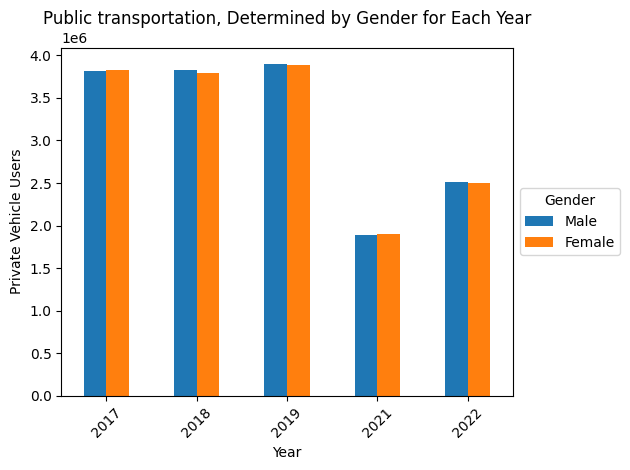

In [ ]:
plt.figure(dpi=1200)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
gender.plot(kind='bar', stacked=False)
plt.title('Public transportation, Determined by Gender for Each Year')
plt.xlabel('Year')
plt.ylabel('Private Vehicle Users')
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
#plt.savefig("pub_bar1.png")
#files.download("pub_bar1.png")

In [ ]:
# gender and private transportation over 5 years

gender_pr = data_2017.iloc[1, 8:10].to_frame()
gender_pr = gender_pr.rename(columns={"Car, truck, or van -- drove alone": "2017"})
gender_pr.index.name = 'Year'
gender_pr["2018"] = data_2018.iloc[1, 8:10]
gender_pr["2019"] = data_2019.iloc[1, 8:10]
gender_pr["2021"] = data_2021.iloc[1, 8:10]
gender_pr["2022"] = data_2022.iloc[1, 8:10]

gender_pr = gender_pr.transpose()
gender_pr

Year        Male      Female
2017  61870400.0  54866203.0
2018  62630190.0  55317437.0
2019  63270428.0  55882921.0
2021  56825016.0  47825105.0
2022  59973480.0  50271888.0

<Figure size 7680x5760 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

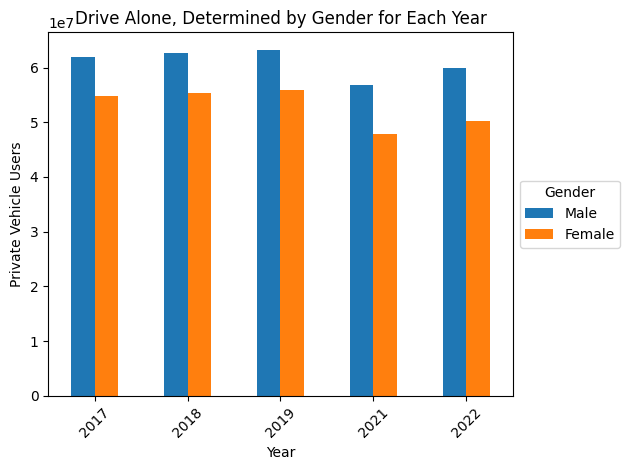

In [ ]:
plt.figure(dpi=1200)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
gender_pr.plot(kind='bar', stacked=False)
plt.title('Drive Alone, Determined by Gender for Each Year')
plt.xlabel('Year')
plt.ylabel('Private Vehicle Users')
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
#plt.savefig("pub_bar2.png")
#files.download("pub_bar2.png")

In [ ]:
# gender and car-pool over 5 years

gender_cp = data_2017.iloc[2, 8:10].to_frame()
gender_cp = gender_cp.rename(columns={"Car, truck, or van -- carpooled": "2017"})
gender_cp.index.name = 'Year'
gender_cp["2018"] = data_2018.iloc[2, 8:10]
gender_cp["2019"] = data_2019.iloc[2, 8:10]
gender_cp["2021"] = data_2021.iloc[2, 8:10]
gender_cp["2022"] = data_2022.iloc[2, 8:10]

gender_cp = gender_cp.transpose()
gender_cp

Year       Male     Female
2017  7169441.0  6434812.0
2018  7270908.0  6631401.0
2019  7186806.0  6714173.0
2021  6165416.0  5852938.0
2022  7093225.0  6787842.0

<Figure size 7680x5760 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

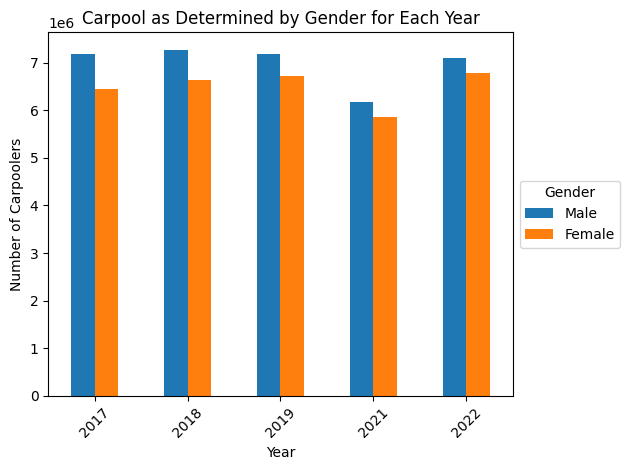

In [ ]:
#plotting the data
plt.figure(dpi=1200)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
gender_cp.plot(kind='bar', stacked=False)
plt.title('Carpool as Determined by Gender for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Carpoolers')
plt.legend(title='Gender', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
#plt.savefig("pub_bar3.png")
#files.download("pub_bar3.png")

In [ ]:
gender_all =pd.concat(dict(Public_tr = gender, Dr_alone = gender_pr, Carpool = gender_cp),axis=1)

gender_all

Public_tr               Dr_alone                Carpool           
Year       Male     Female        Male      Female       Male     Female
2017  3811011.0  3826285.0  61870400.0  54866203.0  7169441.0  6434812.0
2018  3822491.0  3792033.0  62630190.0  55317437.0  7270908.0  6631401.0
2019  3897000.0  3881444.0  63270428.0  55882921.0  7186806.0  6714173.0
2021  1892871.0  1900458.0  56825016.0  47825105.0  6165416.0  5852938.0
2022  2511581.0  2501554.0  59973480.0  50271888.0  7093225.0  6787842.0

Text(0.5, 1.0, 'Comparing Transportation Modes Over Time')

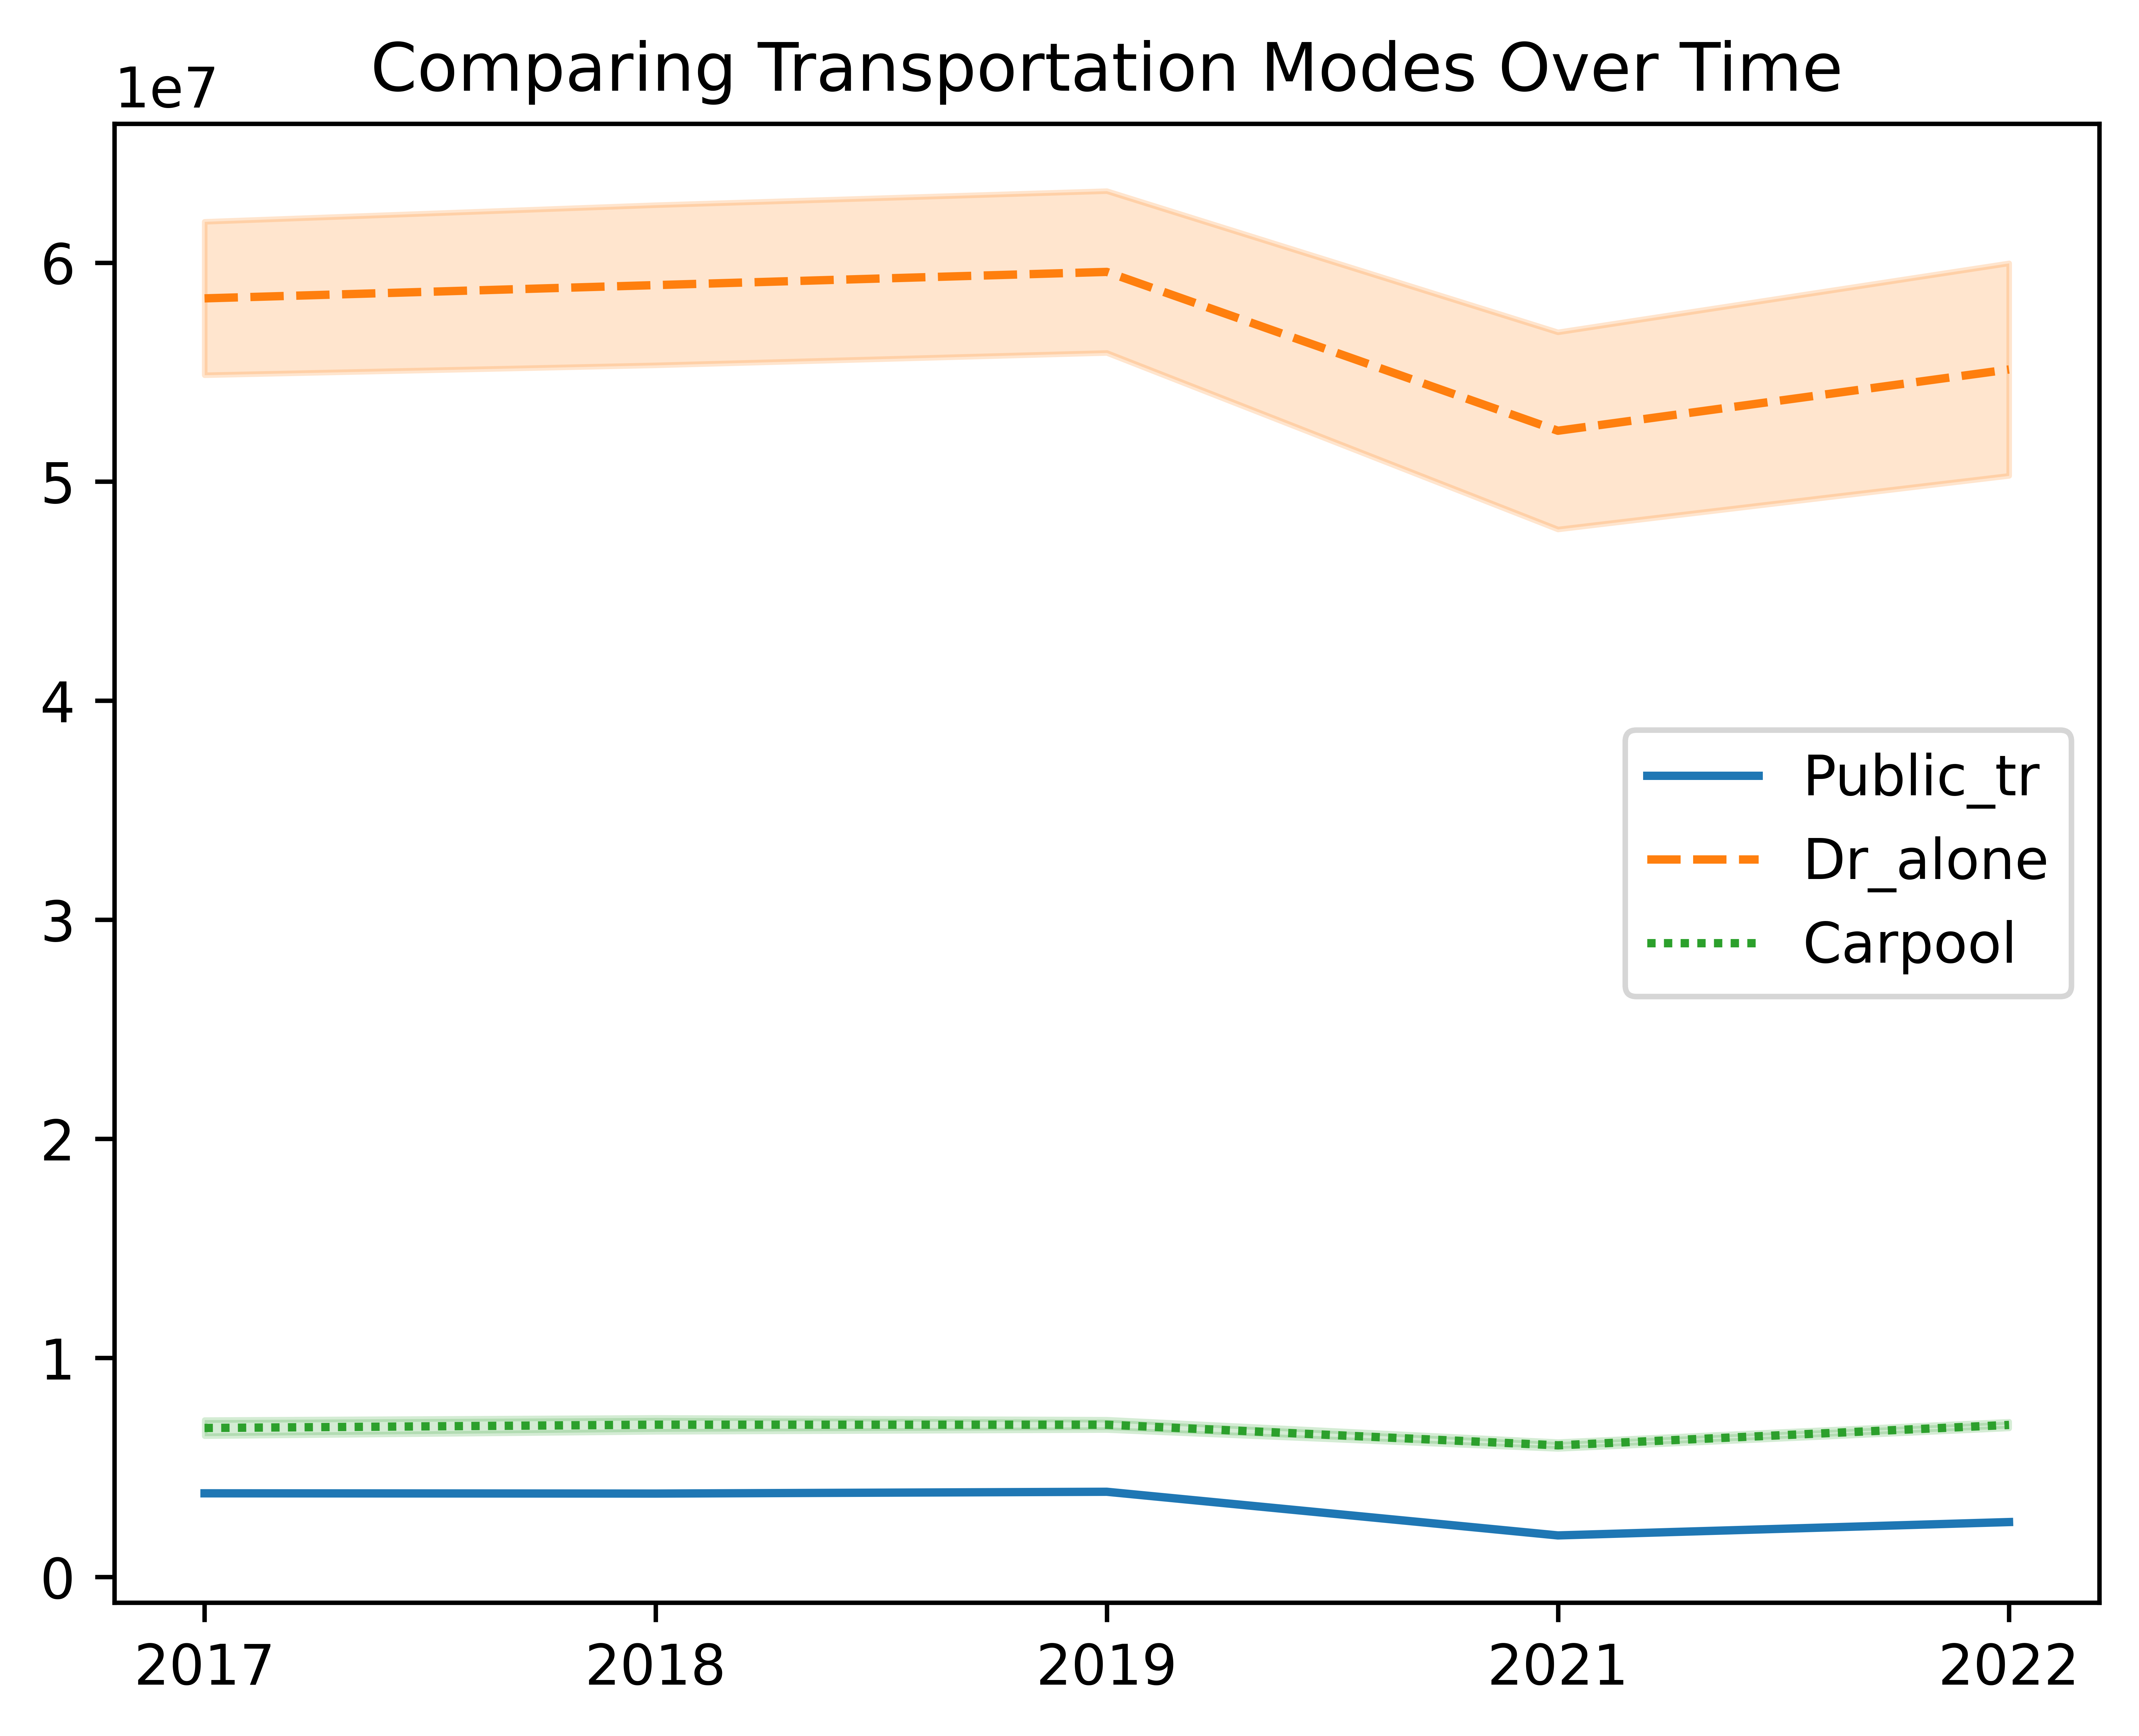

In [ ]:
plt.figure(dpi=1200)
sns.lineplot(data = gender_all);
plt.title('Comparing Transportation Modes Over Time')

In [ ]:
gender_r = (gender["Male"]/gender["Female"]).to_frame()
gender_r = gender_r.rename(columns = {0: "M/F Public transportatinon"})
gender_r["M/F Drive alone"] = (gender_pr["Male"]/gender_pr["Female"]).to_frame()
gender_r["M/F Carpool"] = (gender_cp["Male"]/gender_cp["Female"]).to_frame()

gender_r

M/F Public transportatinon  M/F Drive alone  M/F Carpool
2017                    0.996008         1.127660     1.114165
2018                    1.008032         1.132196     1.096436
2019                    1.004008         1.132196     1.070393
2021                    0.996008         1.188184     1.053388
2022                    1.004008         1.192982     1.044990

Text(0.5, 1.0, 'Proportion of Men to Women, Transportation Modes Over Time')

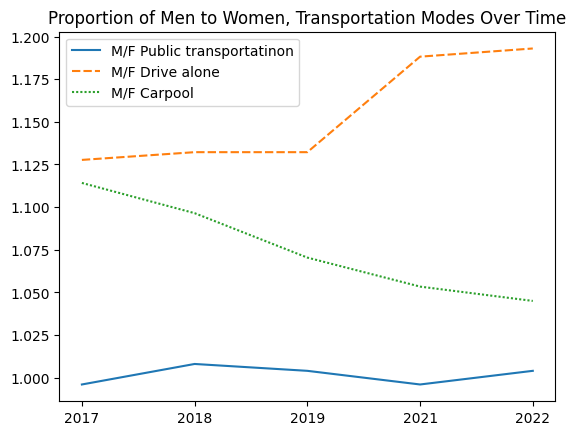

In [ ]:
# Is this what you wanted to do? feel free to delete if not lol
# plt.figure(dpi=1200)
sns.lineplot(data = gender_r);
plt.title('Proportion of Men to Women, Transportation Modes Over Time')

In [ ]:
# Age and using public transport

# First convert range strings to numerical values
age = data_2017.iloc[3, 1:7].to_frame()
age = age.rename(columns={"Public transportation (excluding taxicab)": "2017"})
age.index.name = 'Age'
age["2018"] = data_2018.iloc[3, 1:7]
age["2019"] = data_2019.iloc[3, 1:7]
age["2021"] = data_2021.iloc[3, 1:7]
age["2022"] = data_2022.iloc[3, 1:7]

age


2017     2018     2019     2021     2022
Age                                                             
16 to 19 years      213844.0   197978   210018   113800   165433
20 to 24 years      840103.0   814754   832294   402093   561471
25 to 44 years     3826285.0  3883407  3951450  1771485  2396279
45 to 54 years     1382351.0  1355385  1369006   690386   882312
55 to 59 years      610984.0   601547   598940   337606   411077
60 years and over   763730.0   761452   808958   481753   601576

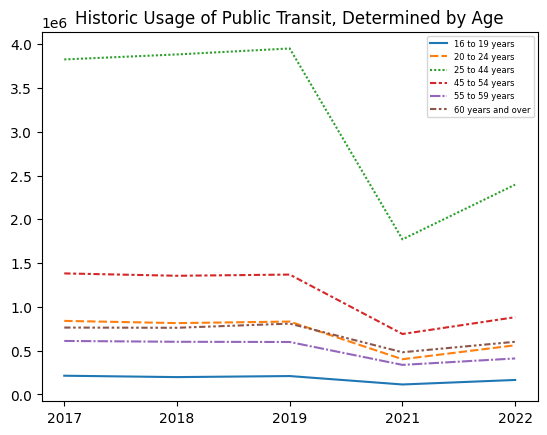

In [ ]:
age1= age.transpose()
sns.lineplot(data = age1)
plt.title('Historic Usage of Public Transit, Determined by Age')
plt.legend(loc='upper right', prop={'size': 6});
#plt.savefig("public_age.png")
#files.download("public_age.png")

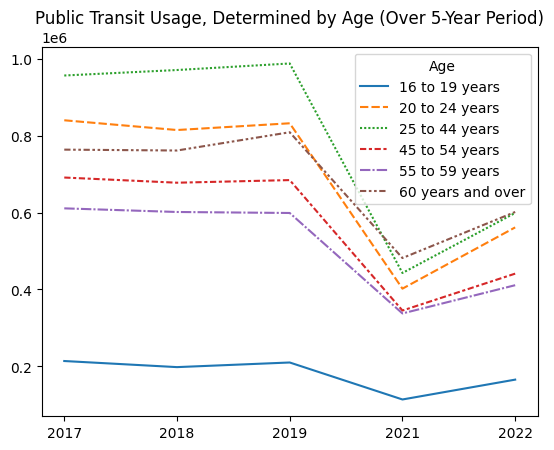

In [ ]:
age_divide = age.copy()
age_divide.iloc[2] = age_divide.iloc[2]/4
age_divide.iloc[3] = age_divide.iloc[3]/2
age_divide = age_divide.transpose()

sns.lineplot(data = age_divide)
plt.title('Public Transit Usage, Determined by Age (Over 5-Year Period)');
#plt.savefig("public_age.png")
#files.download("public_age.png")

In [ ]:
# Age and total commute

# First convert range strings to numerical values
age_all = data_2017.iloc[0, 1:7].to_frame()
age_all = age_all.rename(columns={"Total": "2017"})
age_all.index.name = 'Age'
age_all["2018"] = data_2018.iloc[0, 1:7]
age_all["2019"] = data_2019.iloc[0, 1:7]
age_all["2021"] = data_2021.iloc[0, 1:7]
age_all["2022"] = data_2022.iloc[0, 1:7]

age_all = age_all.transpose()

age_all

Age   16 to 19 years  20 to 24 years  25 to 44 years  45 to 54 years  \
2017       5348094.0      14516254.0      66316360.0      32241364.0   
2018       5411331.0      14533288.0      67718936.0      31849545.0   
2019       5649888.0      14752487.0      68740310.0      31702152.0   
2021       5863939.0      14042590.0      67898239.0      30862836.0   
2022       6101954.0      15415463.0      70493626.0      31794392.0   

Age   55 to 59 years  60 years and over  
2017      14821859.0         19558742.0  
2018      14842507.0         20253837.0  
2019      14909428.0         21187082.0  
2021      14505533.0         21295357.0  
2022      14451996.0         22320305.0

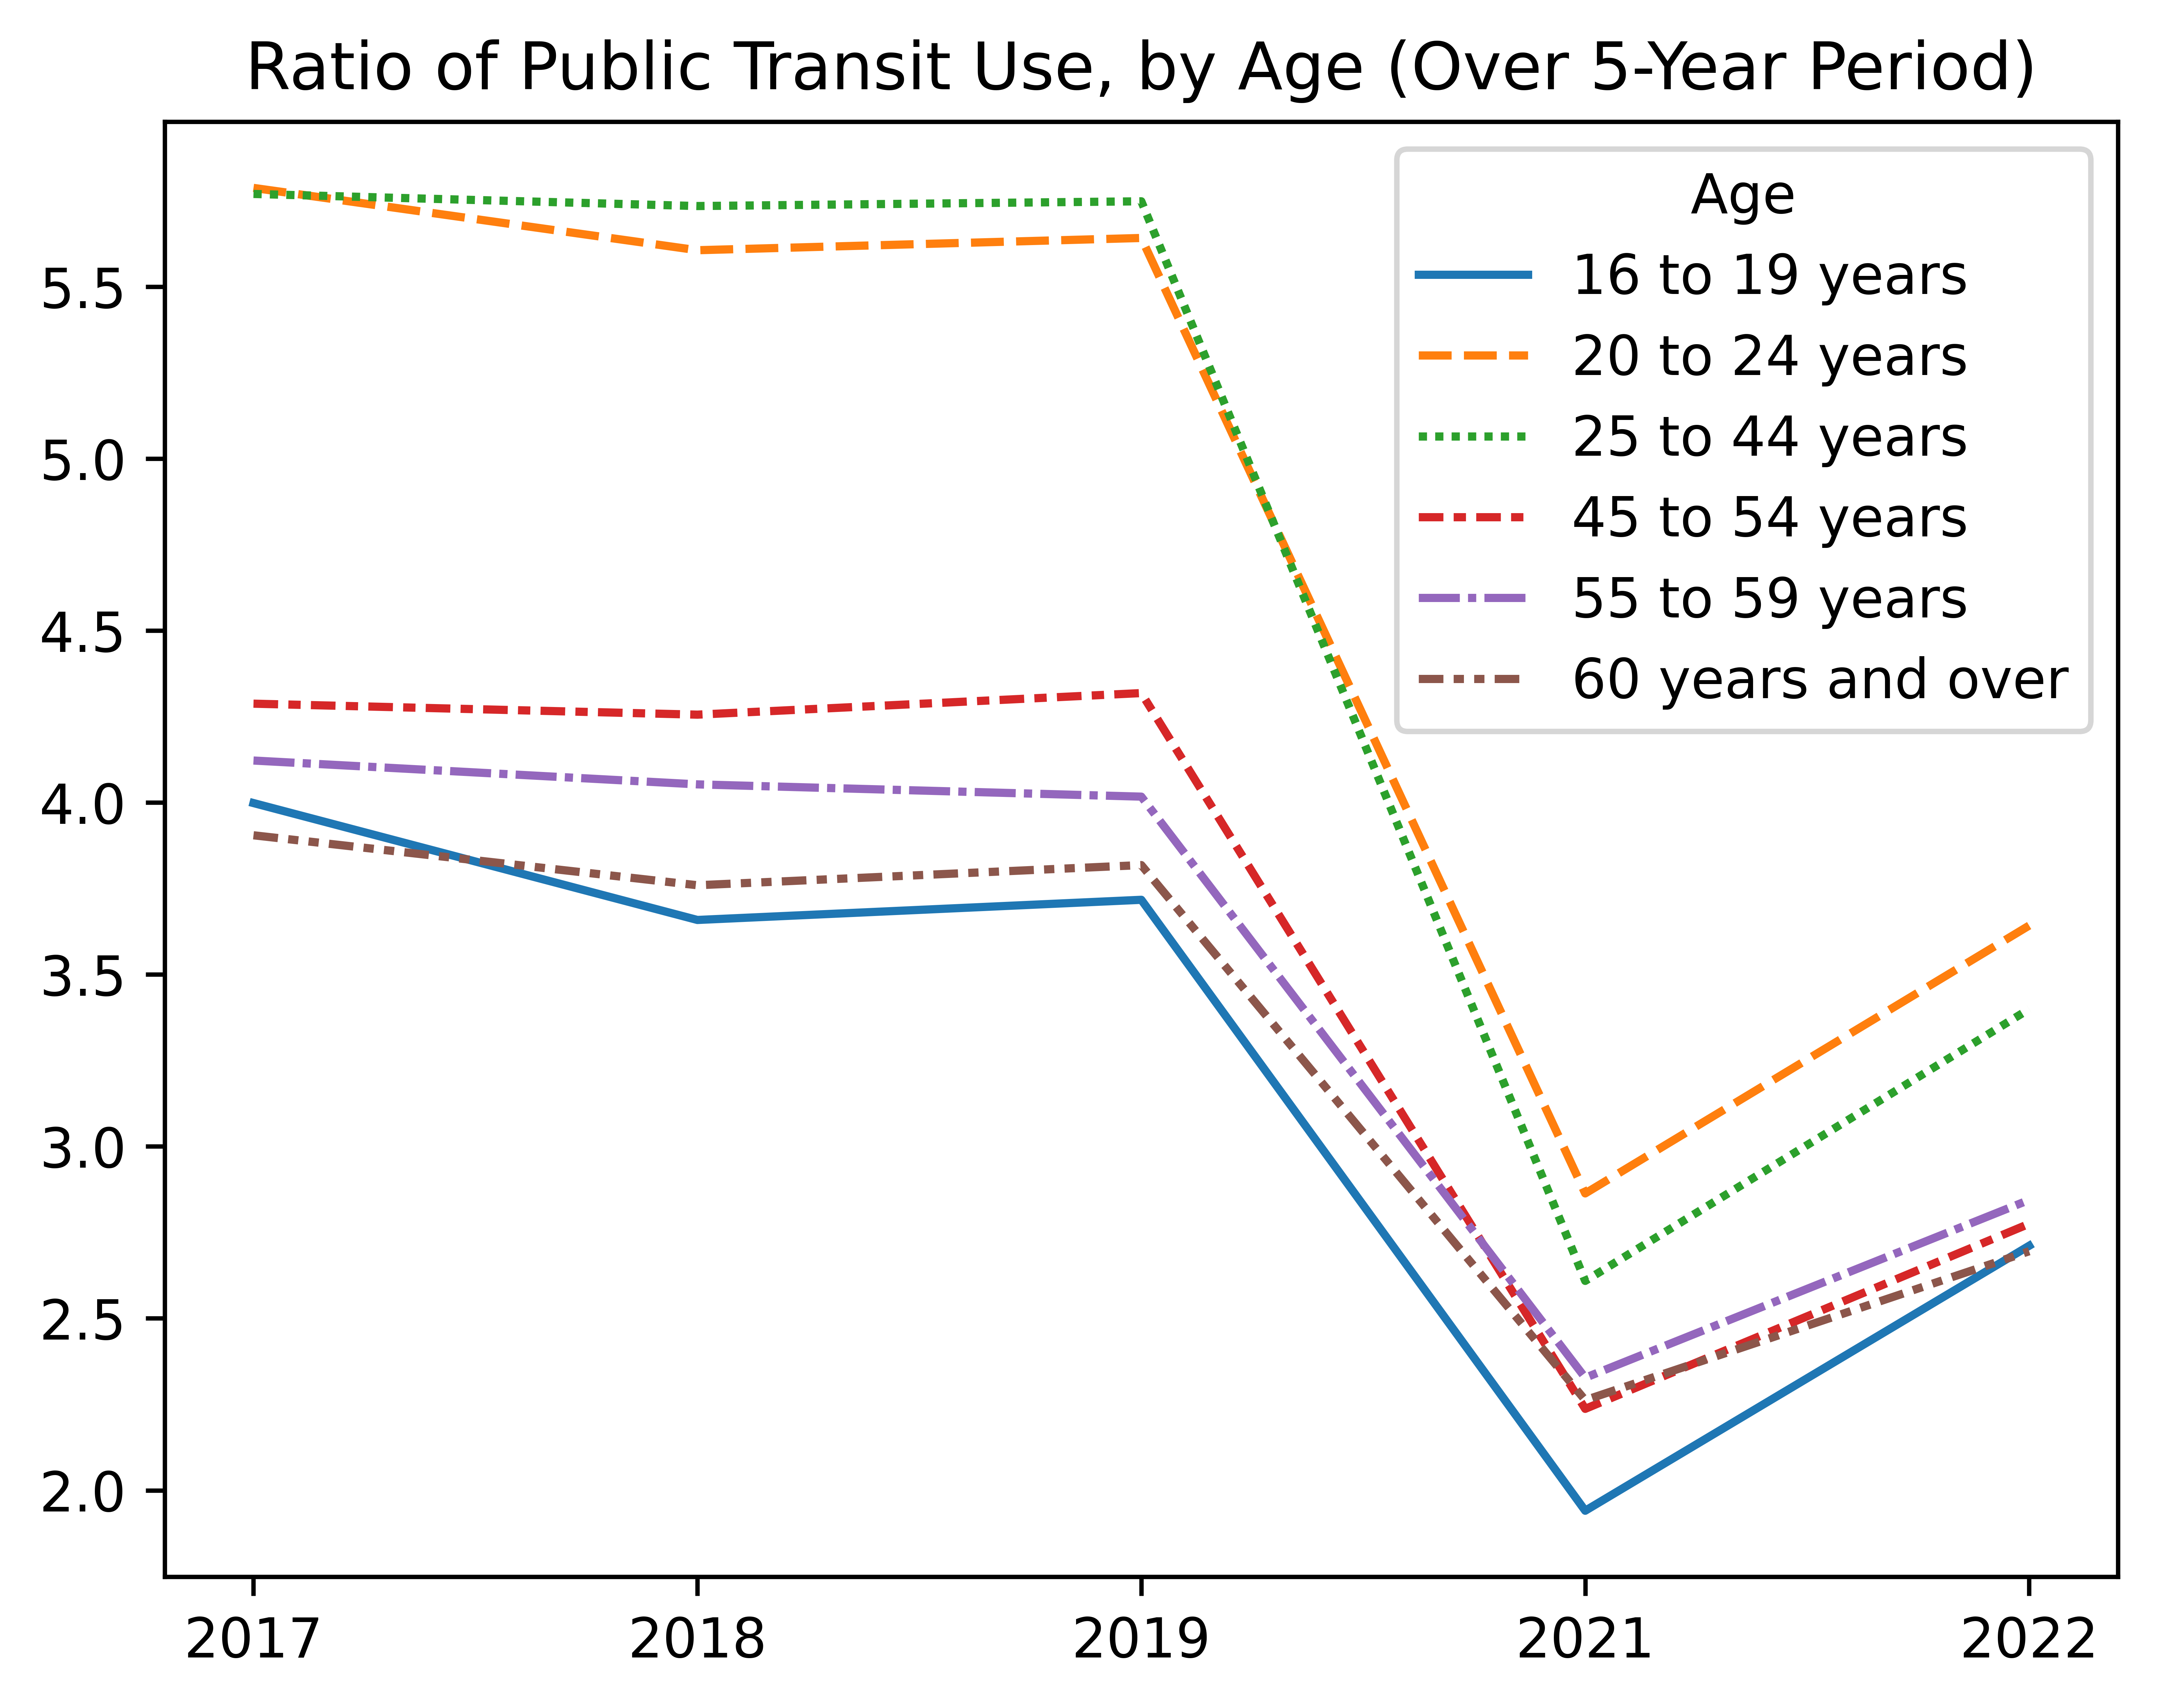

In [ ]:
# ratio of pulic transportation use / total response in age group
age_perc = age1.divide(age_all) * 100
age_perc
plt.figure(dpi=1200)
sns.lineplot(data = age_perc)
plt.title('Ratio of Public Transit Use, by Age (Over 5-Year Period)');
#plt.savefig("ratio_age.png")
#files.download("ratio_age.png")

In [ ]:
age_h = age.copy()

age_h.index.name = 'Age'
age_h["Age_mid"] = np.array([18,22.5,35,50,57.5,75])

age_h

2017     2018     2019     2021     2022  Age_mid
Age                                                                      
16 to 19 years      213844.0   197978   210018   113800   165433     18.0
20 to 24 years      840103.0   814754   832294   402093   561471     22.5
25 to 44 years     3826285.0  3883407  3951450  1771485  2396279     35.0
45 to 54 years     1382351.0  1355385  1369006   690386   882312     50.0
55 to 59 years      610984.0   601547   598940   337606   411077     57.5
60 years and over   763730.0   761452   808958   481753   601576     75.0

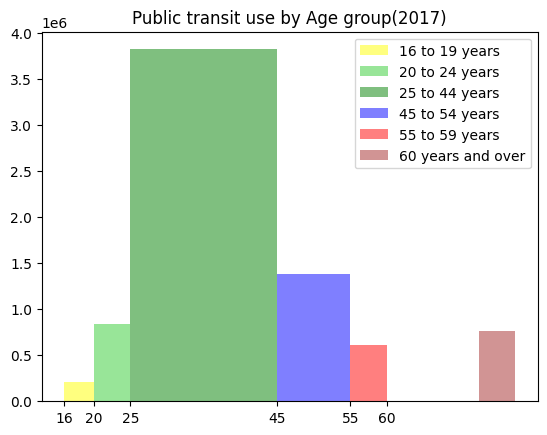

In [ ]:
colors = ["yellow","limegreen","green","blue","red","brown","grey","black"]

width = [4,5,20,10,5,5]
xticks = [16,20,25,45,55,60]

fig = plt.bar(age_h["Age_mid"],
        height = age_h["2017"],
        width = width,
        color = colors,
        alpha = 0.5,
      )

plt.xticks(ticks = xticks, labels = xticks)

plt.legend(fig.patches, age_h.index)
plt.title('Public transit use by Age group(2017)')

plt.show()

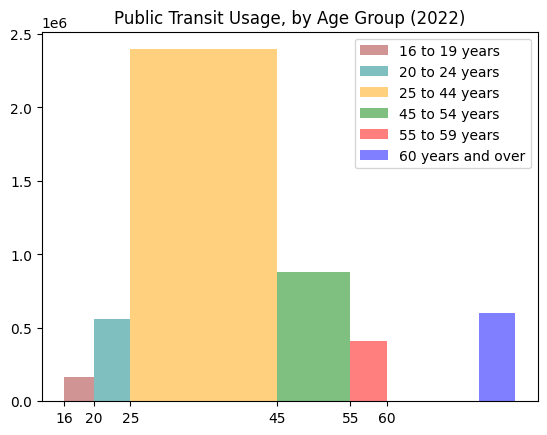

In [ ]:
colors = ["brown","teal","orange","green","red","blue","grey","green"]

width = [4,5,20,10,5,5]
xticks = [16,20,25,45,55,60]

fig = plt.bar(age_h["Age_mid"],
        height = age_h["2022"],
        width = width,
        color = colors,
        alpha = 0.5,
      )

plt.xticks(ticks = xticks, labels = xticks)

plt.legend(fig.patches, age_h.index)
plt.title('Public Transit Usage, by Age Group (2022)')

plt.show()

In [ ]:
# average value across the five years
age2 = age.copy()
avg_16 = sum(list(age2.iloc[0,:]))/5
avg_20 = sum(list(age2.iloc[1,:]))/5
avg_25 = sum(list(age2.iloc[2,:]))/5
avg_45 = sum(list(age2.iloc[3,:]))/5
avg_55 = sum(list(age2.iloc[4,:]))/5
avg_60 = sum(list(age2.iloc[5,:]))/5
age2['Average'] = [avg_16, avg_20, avg_25, avg_45, avg_55, avg_60]

age2

2017     2018     2019     2021     2022    Average
Age                                                                        
16 to 19 years      213844.0   197978   210018   113800   165433   180214.6
20 to 24 years      840103.0   814754   832294   402093   561471   690143.0
25 to 44 years     3826285.0  3883407  3951450  1771485  2396279  3165781.2
45 to 54 years     1382351.0  1355385  1369006   690386   882312  1135888.0
55 to 59 years      610984.0   601547   598940   337606   411077   512030.8
60 years and over   763730.0   761452   808958   481753   601576   683493.8

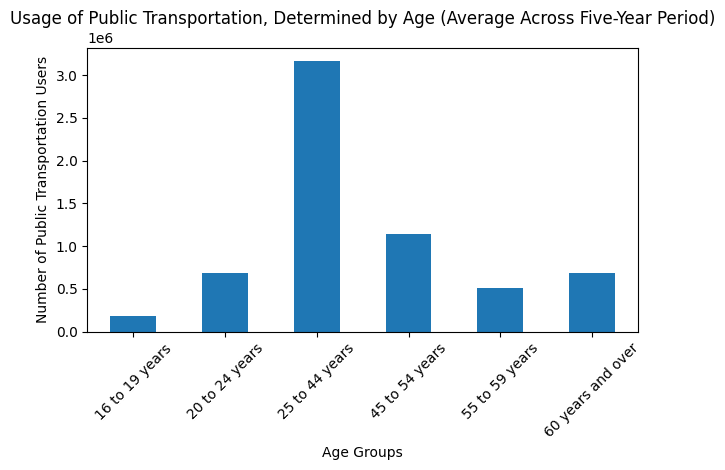

In [ ]:
#plt.figure(figsize=(10, 6),dpi=1200)  # Adjust the figure size as needed
age2['Average'].plot(kind='bar', stacked = False)
plt.title('Usage of Public Transportation, Determined by Age (Average Across Five-Year Period)')
plt.xlabel('Age Groups')
plt.ylabel('Number of Public Transportation Users')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()

In [ ]:
# NEW AGE GROUPS

avg_16 = sum(list(age_h.iloc[0,0:4]))/5/4*5 #(4 years -> 5 year)
avg_20 = sum(list(age_h.iloc[1,0:4]))/5
avg_25 = sum(list(age_h.iloc[2,0:4]))/5/4 #(20 years -> 5 year)
avg_45 = sum(list(age_h.iloc[3,0:4]))/5/2
avg_55 = sum(list(age_h.iloc[4,0:4]))/5
avg_60 = sum(list(age_h.iloc[5,0:4]))/5/6

age_h['Average'] = [avg_16, avg_20, avg_25, avg_45, avg_55, avg_60]

age_h

2017     2018     2019     2021     2022  Age_mid  \
Age                                                                         
16 to 19 years      213844.0   197978   210018   113800   165433     18.0   
20 to 24 years      840103.0   814754   832294   402093   561471     22.5   
25 to 44 years     3826285.0  3883407  3951450  1771485  2396279     35.0   
45 to 54 years     1382351.0  1355385  1369006   690386   882312     50.0   
55 to 59 years      610984.0   601547   598940   337606   411077     57.5   
60 years and over   763730.0   761452   808958   481753   601576     75.0   

                     Average  
Age                           
16 to 19 years     183910.00  
20 to 24 years     577848.80  
25 to 44 years     671631.35  
45 to 54 years     479712.80  
55 to 59 years     429815.40  
60 years and over   93863.10

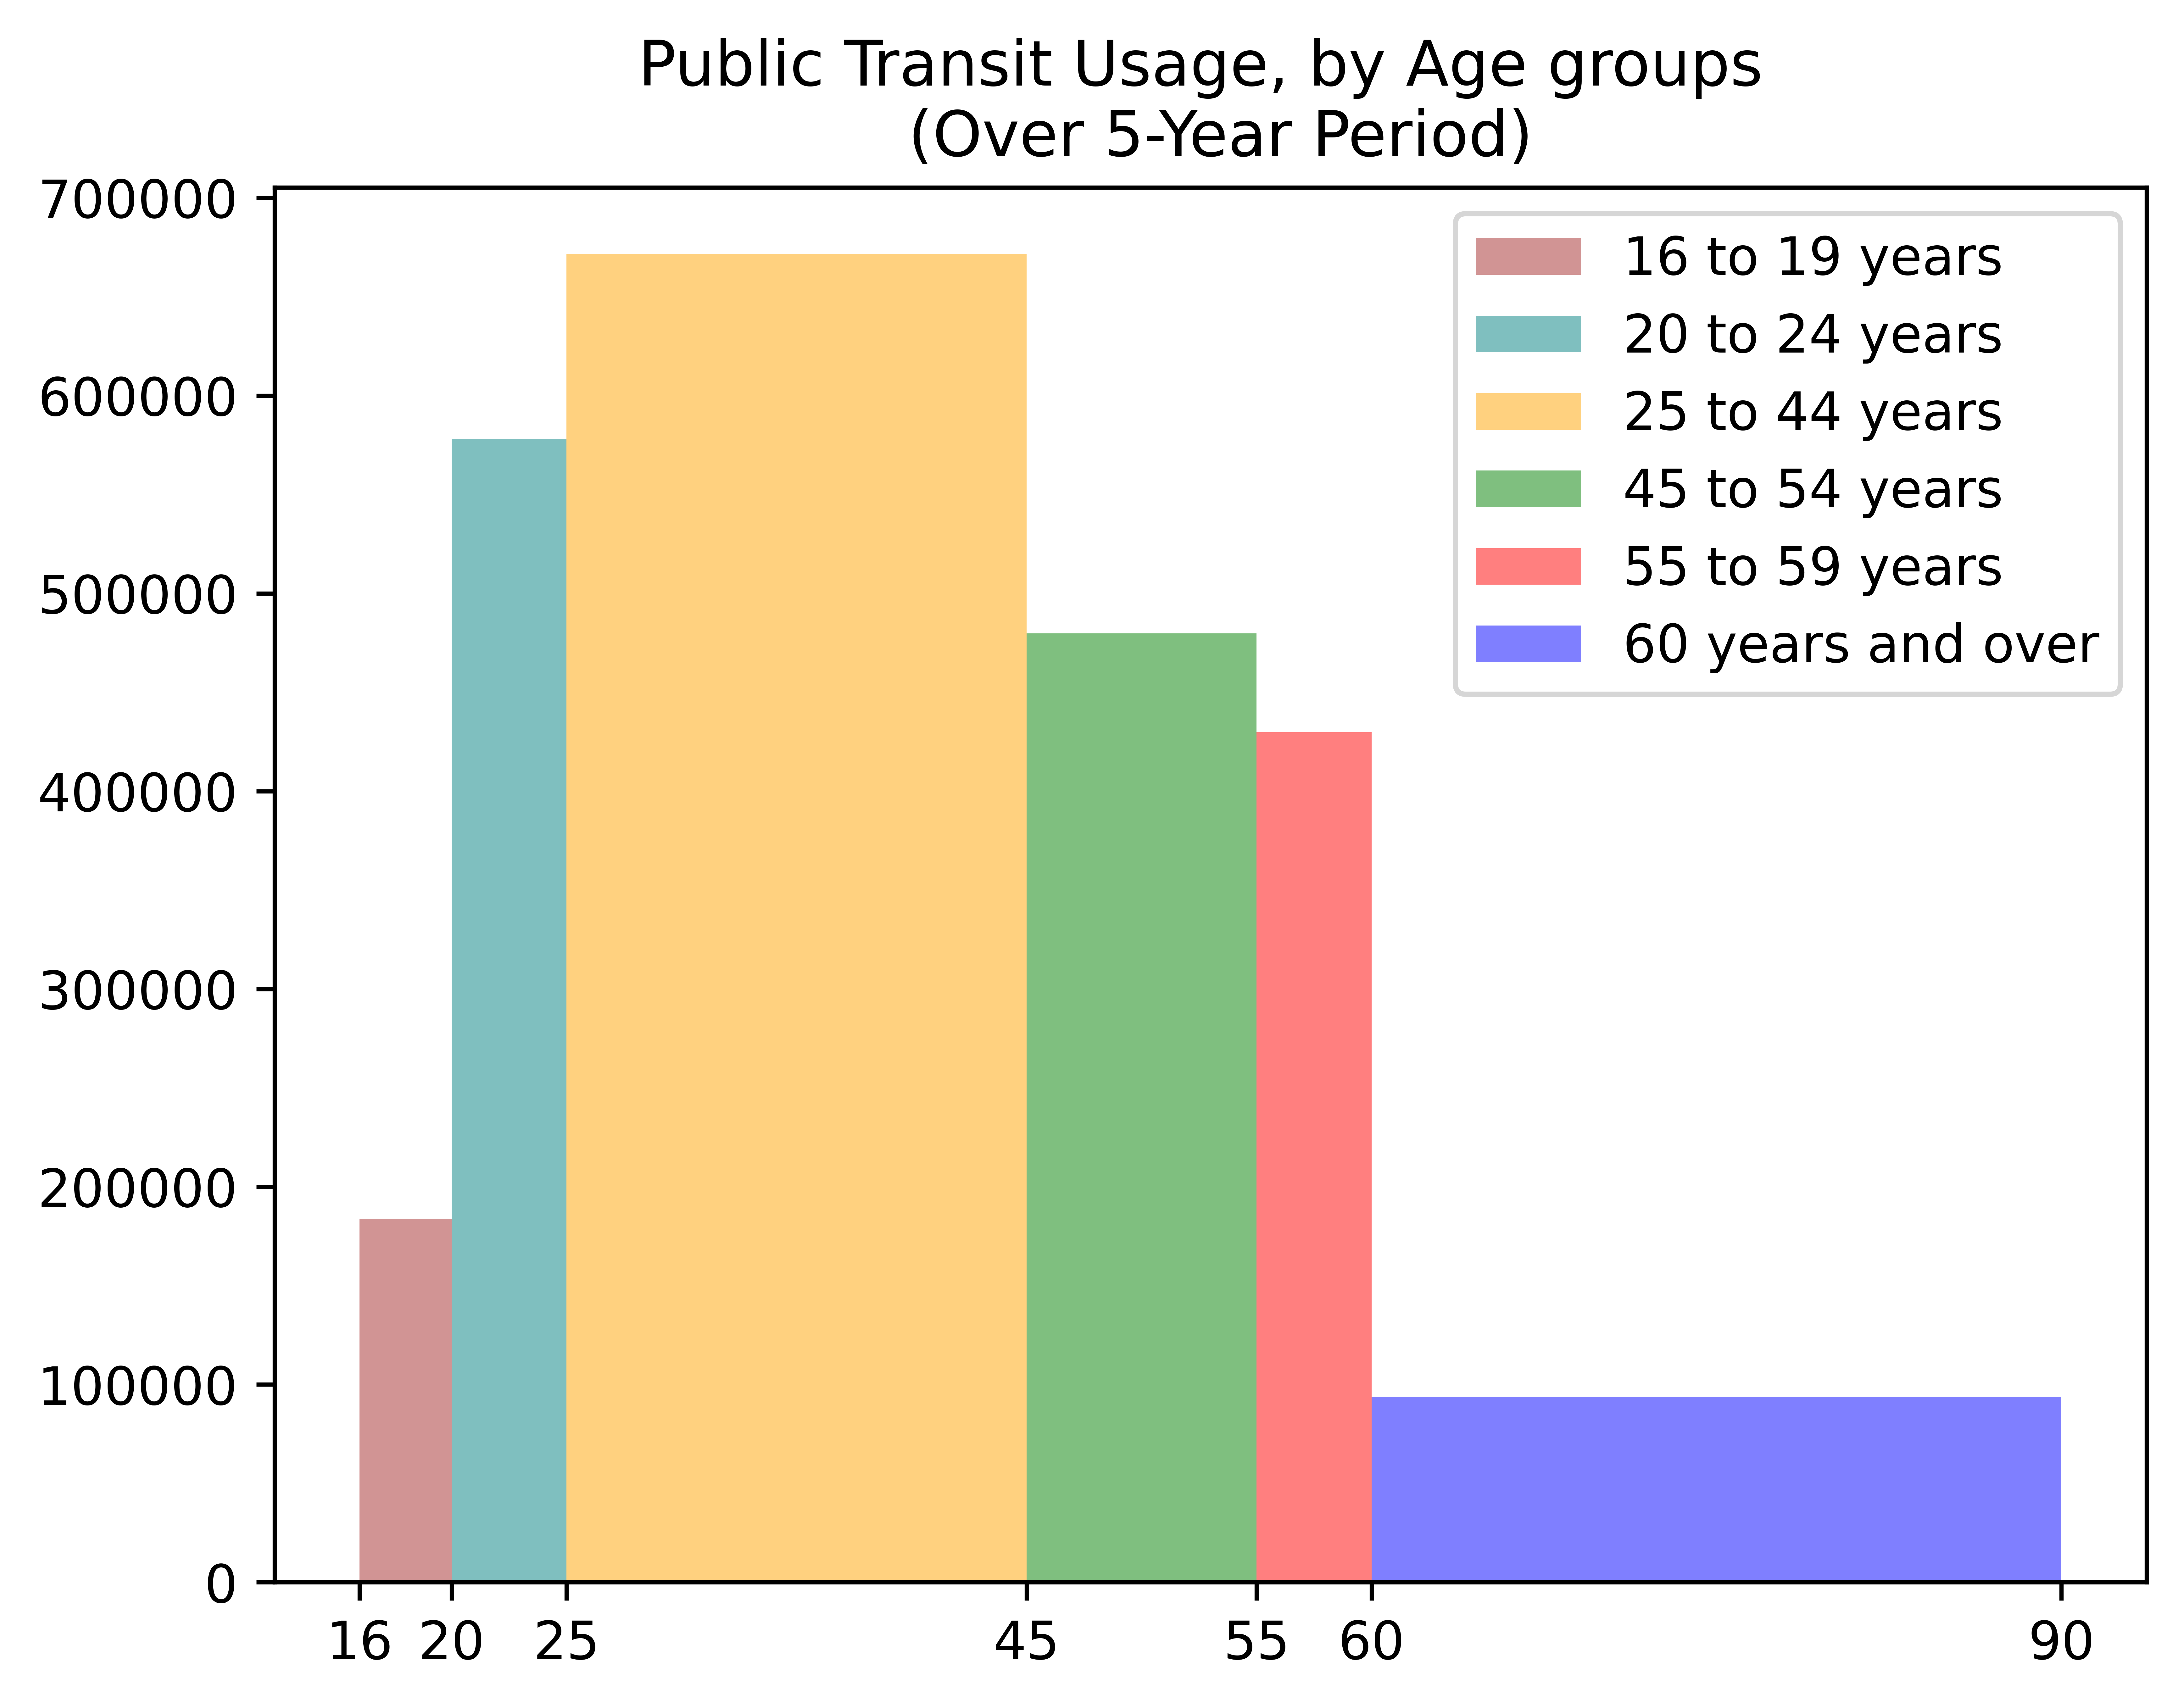

In [ ]:
# NEW AGE GROUPS

colors = ["brown","teal","orange","green","red","blue","grey","green"]

width = [4,5,20,10,5,30]
xticks = [16,20,25,45,55,60,90]

plt.figure(dpi=1200)

fig = plt.bar(age_h["Age_mid"],
        height = age_h['Average'],
        width = width,
        color = colors,
        alpha = 0.5,
      )

plt.xticks(ticks = xticks, labels = xticks)

plt.legend(fig.patches, age_h.index)
plt.title('Public Transit Usage, by Age groups \n (Over 5-Year Period)')

#plt.savefig("histogram.png")
#files.download("histogram.png")

plt.show()

In [ ]:
# vehicle availability and use of public transportation over 5 years

avail = data_2017.iloc[3, -4:].to_frame()
avail = avail.rename(columns={"Public transportation (excluding taxicab)": "2017"})
avail["2018"] = data_2018.iloc[3, -4:]
avail["2019"] = data_2019.iloc[3, -4:]
avail["2021"] = data_2021.iloc[3, -4:]
avail["2022"] = data_2022.iloc[3, -4:]
avail['num_veh'] = [0,1,2,3]
avail.index.name = 'Vehicle'

avail

2017     2018     2019     2021     2022  \
Vehicle                                                                       
No vehicle available          2643373.0  2629029  2643313  1554719  1929000   
1 vehicle available           2319541.0  2321057  2382813  1137145  1531420   
2 vehicles available          1641753.0  1652533  1670267   641275   937504   
3 or more vehicles available   926310.0   916404   957722   395204   515382   

                              num_veh  
Vehicle                                
No vehicle available                0  
1 vehicle available                 1  
2 vehicles available                2  
3 or more vehicles available        3

In [ ]:
avail_m = avail.melt('num_veh', var_name='year', value_name='vals')
avail_m

num_veh  year       vals
0         0  2017  2643373.0
1         1  2017  2319541.0
2         2  2017  1641753.0
3         3  2017   926310.0
4         0  2018  2629029.0
5         1  2018  2321057.0
6         2  2018  1652533.0
7         3  2018   916404.0
8         0  2019  2643313.0
9         1  2019  2382813.0
10        2  2019  1670267.0
11        3  2019   957722.0
12        0  2021  1554719.0
13        1  2021  1137145.0
14        2  2021   641275.0
15        3  2021   395204.0
16        0  2022  1929000.0
17        1  2022  1531420.0
18        2  2022   937504.0
19        3  2022   515382.0

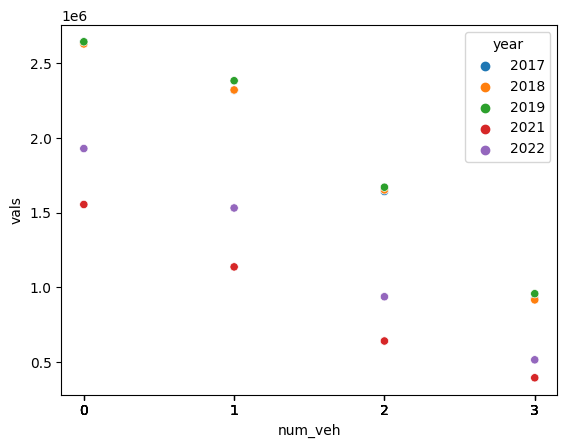

In [ ]:
sns.scatterplot(data=avail_m, x="num_veh", y="vals", hue="year")
plt.xticks(ticks= avail_m["num_veh"]);

In [ ]:
# split size is between 90:10 and 75:25. Total list amout is 20, 16:4
train, test = train_test_split(avail_m, test_size=0.2)

X = train[['year', 'num_veh']]
y = train['vals']

X_test = test[['year', 'num_veh']]
y_test = test['vals']

# Create and train a model for predicting y
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using appropariate objective function
mean_squared_error(y_test,y_pred)

mean_squared_error(y_test,y_pred)/y_test**2

16    0.005934
1     0.004104
18    0.025123
0     0.003160
Name: vals, dtype: float64

In [ ]:
avail_2022 = data_2022.iloc[1:4, -4:]
#avail_2017 = avail_2017.T
avail_2022.index.name = 'Vehicle'
avail_2022

Unnamed: 0                                 No vehicle available  \
Vehicle                                                           
Car, truck, or van -- drove alone                       1756939   
Car, truck, or van -- carpooled                          659519   
Public transportation (excluding taxicab)               1929000   

Unnamed: 0                                 1 vehicle available  \
Vehicle                                                          
Car, truck, or van -- drove alone                     21193078   
Car, truck, or van -- carpooled                        2802955   
Public transportation (excluding taxicab)              1531420   

Unnamed: 0                                 2 vehicles available  \
Vehicle                                                           
Car, truck, or van -- drove alone                      45790226   
Car, truck, or van -- carpooled                         5097531   
Public transportation (excluding taxicab)                937504   

Unnamed: 0                                 3 or more vehicles available  
Vehicle                                                                  
Car, truck, or van -- drove alone                              40958643  
Car, truck, or van -- carpooled                                 5179971  
Public transportation (excluding taxicab)                        515382

In [ ]:
# Create an empty list to store individual DataFrames
frames = []

# Iterate through each row except the last row (as it seems to be a total)
for idx in range(len(avail_2022)):
    # Extract the row representing the transportation method
    transportation_row = avail_2022.iloc[idx]

    # Extract the mode of transportation (index of the row)
    mode_of_transport = avail_2022.index[idx]

    # Convert the numeric values to integers
    transportation_int = transportation_row.astype(int)

    # Create 'cars' column based on numeric values
    car0 = [0] * transportation_int['No vehicle available']
    car1 = [1] * transportation_int['1 vehicle available']
    car2 = [2] * transportation_int['2 vehicles available']
    car3 = [3] * transportation_int['3 or more vehicles available']

    # Combine the lists to create a DataFrame for each transportation method
    numCars = car0 + car1 + car2 + car3

    # Create a DataFrame with transportation mode and number of cars
    transportation_df = pd.DataFrame({'Mode Of Transport': mode_of_transport,
                                      'Number Of Cars': numCars})

    # Append the created DataFrame to the list
    frames.append(transportation_df)

# Concatenate all individual DataFrames into a single DataFrame
result_df = pd.concat(frames)

In [ ]:
# Take 500,000 entries randomly from the data
sampled_df = result_df.sample(n=1000000, random_state=0, replace=False)

In [ ]:
# One-hot encoding
sampled_df = pd.get_dummies(sampled_df, columns=['Mode Of Transport'], prefix='Transport')

In [ ]:
sampled_df

Number Of Cars  Transport_Car, truck, or van -- carpooled  \
11724474                3                                          1   
4676088                 1                                          0   
8158582                 2                                          1   
3019886                 1                                          0   
68391832                2                                          0   
...                   ...                                        ...   
106513228               3                                          0   
82630630                3                                          0   
18755724                1                                          0   
6414824                 2                                          1   
1548880                 0                                          0   

           Transport_Car, truck, or van -- drove alone  \
11724474                                             0   
4676088                                              1   
8158582                                              0   
3019886                                              0   
68391832                                             1   
...                                                ...   
106513228                                            1   
82630630                                             1   
18755724                                             1   
6414824                                              0   
1548880                                              0   

           Transport_Public transportation (excluding taxicab)  
11724474                                                   0    
4676088                                                    0    
8158582                                                    0    
3019886                                                    1    
68391832                                                   0    
...                                                      ...    
106513228                                                  0    
82630630                                                   0    
18755724                                                   0    
6414824                                                    0    
1548880                                                    1    

[1000000 rows x 4 columns]

In [ ]:
# Splitting the data into features (X) and target variable (y)
X = sampled_df[['Number Of Cars']]
y = sampled_df['Transport_Public transportation (excluding taxicab)']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
mean_squared_error(y_test, y_pred)

Accuracy: 0.96292
Confusion Matrix:
[[192584      0]
 [  7416      0]]


0.03708

In [ ]:
# Generate test data for 'Number Of Cars' and add horizontal noise with a Gaussian distribution
noise_x = np.random.normal(loc=0, scale=0.3, size=X_test.shape)
x_values = X_test.values.reshape(-1, 1) + noise_x.reshape(-1, 1)
x_values = np.abs(x_values)  # Ensuring positive values only

# Add vertical noise to the predicted probabilities with a Gaussian distribution
noise_y = np.random.normal(loc=0, scale=0.05, size=len(X_test))
probabilities = model.predict_proba(X_test)[:, 1] + noise_y
probabilities = np.clip(probabilities, 0, 1)  # Ensure probabilities stay within bounds [0, 1]

# Ensure probabilities remain positive
probabilities = np.abs(probabilities)

# Randomly select 500 points for visualization
indices = np.random.choice(range(len(X_test)), size=500, replace=False)
x_values_subset = x_values[indices]
probabilities_subset = probabilities[indices]

# Generate a range of 'Number Of Cars' values for plotting the regression line
x_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)

# Predict the probabilities for the generated 'Number Of Cars' values
probabilities_range = model.predict_proba(x_range)[:, 1]

# Plot the noisy data with limited points and the logistic regression line
plt.figure(figsize=(8, 6),dpi=1200)
plt.scatter(x_values_subset, probabilities_subset, color='blue', label='Predicted Probabilities', alpha=0.3)
plt.plot(x_range, probabilities_range, color='red', label='Logistic Regression Line')
plt.xlabel('Number Of Cars')
plt.ylabel('Probability of Taking Public Transit')
plt.title('Predicted Probabilities of Taking Public Transit vs Number Of Cars (with Gaussian Noise)')
plt.legend()
plt.show()
#plt.savefig("scat.pdf")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
